<a href="https://colab.research.google.com/github/harnalashok/general/blob/master/fourier_transform_and_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ref: https://www.nti-audio.com/en/support/know-how/fast-fourier-transform-fft
#      https://stackoverflow.com/a/43264370
#  Windows: https://www.egr.msu.edu/classes/me451/me451_labs/Fall_2013/Understanding_FFT_Windows.pdf
# https://docs.cycling74.com/max5/tutorials/msp-tut/mspchapter25.html
https://dsp.stackexchange.com/questions/2818/extracting-frequencies-from-fft

Fourier Series ([FS](https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520))

A Fourier series is an expansion of a periodic function into a sum of trigonometric functions. The Fourier series is an example of a trigonometric series, but not all trigonometric series are Fourier series. By expressing a function as a sum of sines and cosines, many problems involving the function become easier to analyze because trigonometric functions are well understood.

A square wave (represented as the blue dot) is approximated by its sixth partial sum (represented as the purple dot), formed by summing the first six terms (represented as arrows) of the square wave's Fourier series. Each arrow starts at the vertical sum of all the arrows to its left (i.e. the previous partial sum).

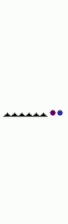

The first four partial sums of the Fourier series for a square wave. As more harmonics are added, the partial sums converge to (become more and more like) the square wave.

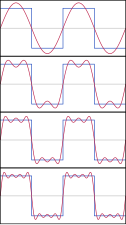

Function `s6(x)` (in red) is a Fourier series sum of 6 harmonically related sine waves (in blue). Its Fourier transform `S(f)` is a frequency-domain representation that reveals the amplitudes of the summed sine waves.

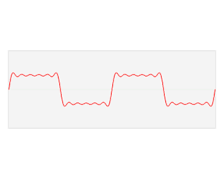

[FFT](https://www.nti-audio.com/en/support/know-how/fast-fourier-transform-fft)
----

Strictly speaking, the FFT is an optimized algorithm for the implementation of the "Discrete Fourier Transformation" (DFT). A signal is sampled over a period of time and divided into its frequency components. These components are single sinusoidal oscillations at distinct frequencies each with their own amplitude and phase. This transformation is illustrated in the following diagram. Over the time period measured, the signal contains 3 distinct dominant frequencies.

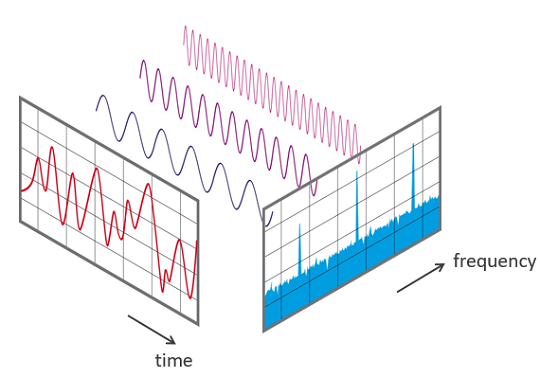

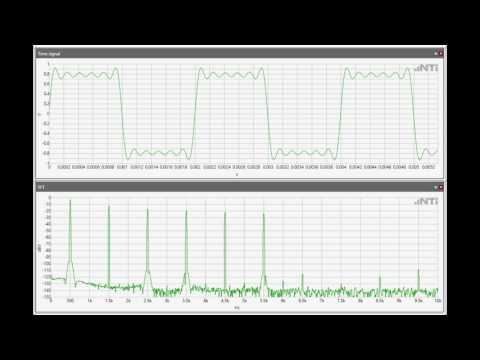

In [1]:
# Here is a youtube video. See in colab:

from IPython.display import YouTubeVideo
YouTubeVideo('EyVJtPg_Vr0')

A good article on understanding Windows is [here](https://www.egr.msu.edu/classes/me451/me451_labs/Fall_2013/Understanding_FFT_Windows.pdf). Here are few diagrams from it.

The Fast Fourier Transform (FFT) is the Fourier
Transform of a block of time data points. It repre-
sents the frequency composition of the time signal.
Figure 2 shows a 10 Hz sine waveform (top) and the
FFT of the sine waveform (bottom). A sine wave is
composed of one pure tone indicated by the single dis-
crete peak in the FFT with height of 1.0 at 10 Hz.

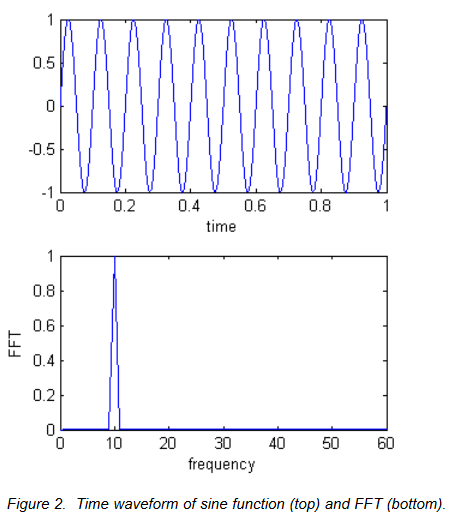

Leakage
-------
The FFT computation assumes that a signal is periodic in
each data block, that is, it repeats over and over again
and it is identical every time. Note this was the case in Figure 2 because there are an interger number of cycles of the sine wave in the data record. Another type of signal that satisfies the periodic requirement is a transient signal that starts at zero at the beginning of the time window and then rises to some maximum and decays again to zero before the end of the time window.     

When the FFT of a non-periodic signal is computed
then the resulting frequency spectrum suffers from
leakage. Leakage results in the signal energy smearing out over a wide frequency range in the FFT when it
should be in a narrow frequency range. Figure 3 illustrates the effect of leakage. The left-top graph shows a 10 Hz sine wave with amplitude 1.0 that is periodic in the time frame. The resulting FFT (bottom-left) shows a narrow peak at 10 Hz in the frequency axis with a height of 1.0 as expected. Note the dB scale is used to highlight the shape of the FFT at low levels. The right-top graph shows a sine wave that is not periodic in the time frame resulting in leakage in the FFT (bottom-right). The amplitude is less than the expected 1.0 value and the signal energy is more dispersed. The dispersed shape of the FFT makes it more difficult to identify the frequency content of the measured signal.

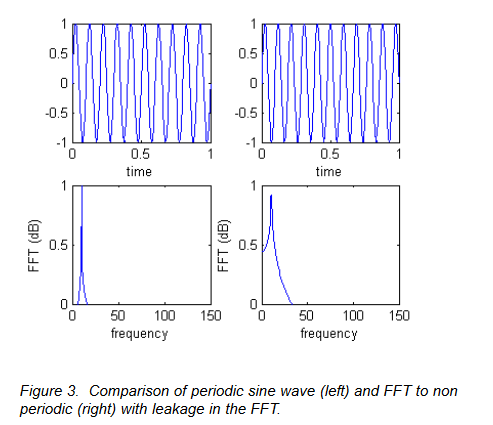

Windowing Reduces Leakage
-------------------------
In a signal analyzer the time record length is adjustable but it must be selected from a set of predefined values. Since most signals are not periodic in the predefined data block time periods, a window must be applied to correct for leakage. A window is shaped so that it is exactly zero at the beginning and end of the data block and has some special shape in between. This function is then multiplied with the time data block forcing the signal to be periodic. A special weighting factor must also be applied so that the correct FFT signal amplitude level is recovered after the windowing. Figure 4 shows the effect of applying a Hanning window to a pure sine tone. The left-top plot shows a sine tone that is not periodic in the time window with out the windowing function resulting in leakage in the FFT (left-bottom).

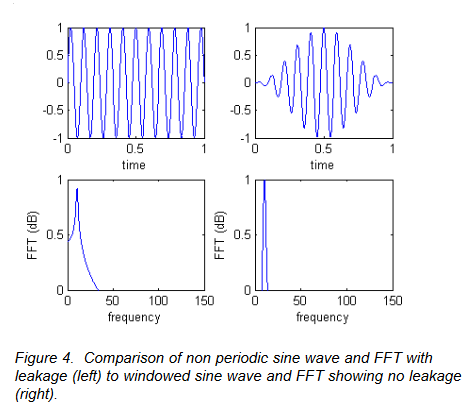

Windowing functions are most easily understood in the
time domain; however, they are often implemented in the
frequency domain instead. Mathematically there is no
difference when the windowing is implemented in the fre-
quency or time domains, though the mathematical proce-
dure is somewhat different. When the window is imple-
mented in the frequency domain, the FFT of the window
function is computed one time and saved in memory and
then it is applied to every FFT frequency value correcting the leakage in the FFT. This gives rise to one measure of the window's characteristics, known as the side lobe. The FFT of a window has a peak at the applied frequency and other peaks, called side lobes, on either side of the applied frequency. The height of the side lobes indicates what affect the windowing function will have on frequencies around the applied frequency. In general, lower side lobes reduce the leakage in the measured FFT but increase the bandwidth of the major lobe.

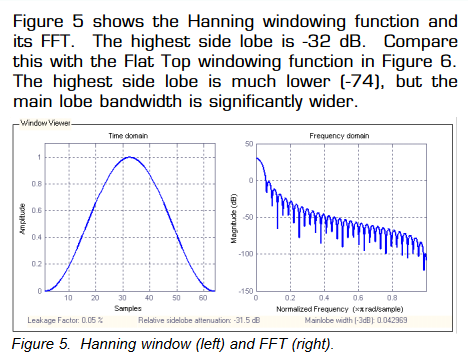

In the above figure note the windowing function on the left in time domain. It reduces the signals at the boundary to zero.    

One of the disadvantages of windowing functions is that
the beginning and end of the signal is attenuated in the
calculation of the spectrum. This means that more averages must be taken to get a good statistical representation of the spectrum, increasing the time to complete the measurement. Overlap processing is a feature that is available in most signal analyzers that can recover the lost data and reduce the measurement time. This processing reduces the total measurement time by recovering a portion of each previous frame that otherwise is lost due to the effect of the windowing function as shown in Figure 9. The top pane shows the original continuous input signal. Below the Input Signal are shown the overlapping windowed frames. Next are the unaveraged FFTs from each frame, and finally at the bottom is the average of the FFTs. Overlap processing is particularly effective at
reducing the measurement time for low frequency tests
(generally under 50 Hz) for which the frame acquisition
times are very long.

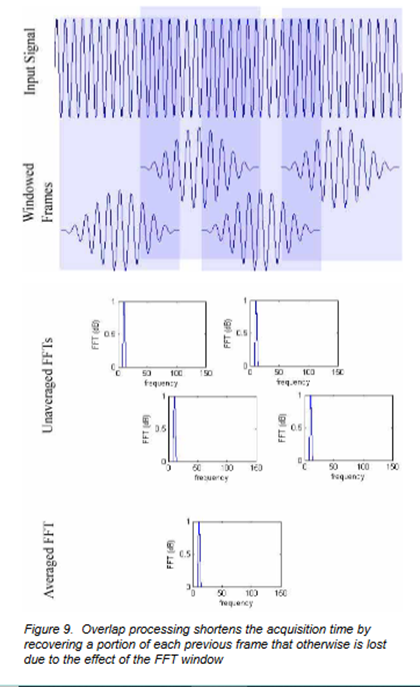